1.Imputing Age and Gender

(a) Now I want to impute imputing age and gender variables into the other dataset. I noticed that both datasets have the variable weight and income. (Total income = Labor income + Capital income) Now in the dataset SurveyIncome.txt, I will use weight and income as independent variables, age and gender as dependent variables to construct two regressions. The regressions are as following: 
\begin{align}
\dot{age} & = β_0 + β_1 tot\_income + β_2 wgt\qquad(1)\\
\dot{female} & = β_0 + β_1 tot\_income + β_2 wgt\qquad(2)
\end{align}
Then, I can add a new variable total income in BestIncome.txt. After that, we use weight, total income and the coefficients we got to impute approximately age and gender.  

(b) Here is where I'll use my proposed method from part (a) to impute variables.

In [2]:
# This code cell is to execute the code that will impute those variables.
import pandas as pd 
dfBI = pd.read_csv('BestIncome.txt', index_col = 0, header = None).reset_index()
dfSI = pd.read_csv('SurvIncome.txt', index_col = 0, header = None).reset_index()

In [3]:
dfBI.shape

(10000, 4)

In [4]:
dfSI.shape

(1000, 4)

In [5]:
# This code is to change the variables. 
dfBI.columns = ['lab_inc', 'cap_inc', 'hgt', 'wgtB']
dfSI.columns = ['tot_inc', 'wgtS', 'age', 'female']

In [6]:
print(dfBI.head())

        lab_inc       cap_inc        hgt        wgtB
0  52655.605507   9279.509829  64.568138  152.920634
1  70586.979225   9451.016902  65.727648  159.534414
2  53738.008339   8078.132315  66.268796  152.502405
3  55128.180903  12692.670403  62.910559  149.218189
4  44482.794867   9812.975746  68.678295  152.726358


In [7]:
print(dfSI.head())

        tot_inc        wgtS        age  female
0  63642.513655  134.998269  46.610021     1.0
1  49177.380692  134.392957  48.791349     1.0
2  67833.339128  126.482992  48.429894     1.0
3  62962.266217  128.038121  41.543926     1.0
4  58716.952597  126.211980  41.201245     1.0


In [8]:
import statsmodels.formula.api as sm

In [9]:
#This is to get the regression result of (1)
result = sm.ols(formula="age ~ tot_inc + wgtS", data=dfSI).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6326
Date:                Tue, 16 Oct 2018   Prob (F-statistic):              0.531
Time:                        21:47:17   Log-Likelihood:                -3199.4
No. Observations:                1000   AIC:                             6405.
Df Residuals:                     997   BIC:                             6419.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.2097      1.490     29.666      0.0

In [10]:
#This is to generate a new variable total_income in BestIncome.txt. 
def get_tot_incB(row):
    lab_inc = row[0]
    cap_inc = row[1]
    tot_incB = lab_inc + cap_inc
    return tot_incB
dfBI['tot_incB'] = dfBI[['lab_inc', 'cap_inc']].apply(get_tot_incB, axis = 1)
print(dfBI.head())

        lab_inc       cap_inc        hgt        wgtB      tot_incB
0  52655.605507   9279.509829  64.568138  152.920634  61935.115336
1  70586.979225   9451.016902  65.727648  159.534414  80037.996127
2  53738.008339   8078.132315  66.268796  152.502405  61816.140654
3  55128.180903  12692.670403  62.910559  149.218189  67820.851305
4  44482.794867   9812.975746  68.678295  152.726358  54295.770612


In [11]:
#This is to impute predicted age in BestIncome.txt.
def get_age_pred(row):
    tot_incB = row[0]
    wgtB = row[1]
    age_pred = 44.2097 + 2.52e-05 * tot_incB +  -0.0067 * wgtB
    return age_pred
dfBI['age_pred'] = dfBI[['tot_incB', 'wgtB']].apply(get_age_pred, axis = 1)
print(dfBI.head())

        lab_inc       cap_inc        hgt        wgtB      tot_incB   age_pred
0  52655.605507   9279.509829  64.568138  152.920634  61935.115336  44.745897
1  70586.979225   9451.016902  65.727648  159.534414  80037.996127  45.157777
2  53738.008339   8078.132315  66.268796  152.502405  61816.140654  44.745701
3  55128.180903  12692.670403  62.910559  149.218189  67820.851305  44.919024
4  44482.794867   9812.975746  68.678295  152.726358  54295.770612  44.554687


In [12]:
#This is to get the regression result of (2)
result = sm.logit(formula="female ~ tot_inc + wgtS", data=dfSI).fit()
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.036050
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 female   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Tue, 16 Oct 2018   Pseudo R-squ.:                  0.9480
Time:                        21:17:15   Log-Likelihood:                -36.050
converged:                       True   LL-Null:                       -693.15
                                        LLR p-value:                4.232e-286
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     76.7929     10.569      7.266      0.000      56.078      97.508
tot_inc       -0.0002   4.25

In [12]:
#This is to impute predicted gender in BestIncome.txt.
import math
def get_female_pred(row):
    tot_incB = row[0]
    wgtB = row[1]
    female_pred = math.exp(3.7611 + -5.25e-06 * tot_incB +  -0.0195 * wgtB)/(1+math.exp(3.7611 + -5.25e-06 * tot_incB +  -0.0195 * wgtB))
    if female_pred > 0.5:
        female_pred = 1
    else:
        female_pred = 0
    return female_pred
dfBI['female_pred'] = dfBI[['tot_incB', 'wgtB']].apply(get_female_pred, axis = 1)
print(dfBI.head())

        lab_inc       cap_inc        hgt        wgtB      tot_incB   age_pred  \
0  52655.605507   9279.509829  64.568138  152.920634  61935.115336  44.745897   
1  70586.979225   9451.016902  65.727648  159.534414  80037.996127  45.157777   
2  53738.008339   8078.132315  66.268796  152.502405  61816.140654  44.745701   
3  55128.180903  12692.670403  62.910559  149.218189  67820.851305  44.919024   
4  44482.794867   9812.975746  68.678295  152.726358  54295.770612  44.554687   

   female_pred  
0            1  
1            1  
2            1  
3            1  
4            1  


(c)Here is where I'll report the descriptive statistics for my new imputed variables.

In [13]:
#This is to get the descriptive stats of predicted age. 
print(dfBI['age_pred'].describe())

count    10000.000000
mean        44.894036
std          0.219066
min         43.980016
25%         44.747065
50%         44.890281
75%         45.042239
max         45.706849
Name: age_pred, dtype: float64


In [14]:
#This is to get the descriptive stats of predicted gender. 1 represents 'female'. 
print(dfBI['female_pred'].describe())

count    10000.000000
mean         0.992000
std          0.089089
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: female_pred, dtype: float64


(d) Correlation matrix for the now six variables

In [15]:
#This is to delete the total income variable 'tot_incB' in BestIncome.
dfBI.drop(['tot_incB'], axis=1, inplace=True)

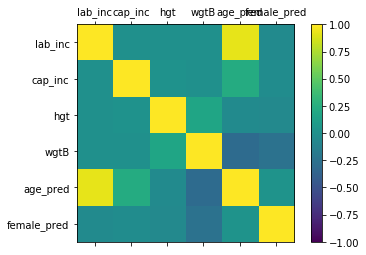

In [17]:
#This is the correlation picture for the now six variables. 
def corr_plot(df):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    names = df.columns
    N = len(names)
    
    correlations = df.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin = -1, vmax = 1)
    fig.colorbar(cax)
    ticks = np.arange(0, N, 1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()
    
corr_plot(dfBI)

In [24]:
#This is the correlation matrix form for the now six variables. 
corr = dfBI.corr()
corr.style.background_gradient()

,lab_inc,cap_inc,hgt,wgtB,age_pred,female_pred
lab_inc,1,0.0053253,0.00278978,0.00450691,0.924329,-0.0459422
cap_inc,0.0053253,1,0.0215716,0.00629868,0.234234,-0.0248725
hgt,0.00278978,0.0215716,1,0.172103,-0.0449272,-0.0583703
wgtB,0.00450691,0.00629868,0.172103,1,-0.299395,-0.243922
age_pred,0.924329,0.234234,-0.0449272,-0.299395,1,0.0261767
female_pred,-0.0459422,-0.0248725,-0.0583703,-0.243922,0.0261767,1


### 2. Stationarity and data drift
#### (a) Estimate by OLS and report coefficients

In [26]:
# Read in my third data set
import pandas as pd 
dfII = pd.read_csv('IncomeIntel.txt', index_col = 0, header = None).reset_index()

In [27]:
# Name my variables
dfII.columns = ['grad_year', 'gre_qnt', 'salary_p4']
print(dfII.head())

   grad_year     gre_qnt     salary_p4
0     2001.0  739.737072  67400.475185
1     2001.0  721.811673  67600.584142
2     2001.0  736.277908  58704.880589
3     2001.0  770.498485  64707.290345
4     2001.0  735.002861  51737.324165


In [28]:
# Run regression model
result = sm.ols(formula="salary_p4 ~ gre_qnt", data=dfII).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:              salary_p4   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     356.3
Date:                Tue, 16 Oct 2018   Prob (F-statistic):           3.43e-68
Time:                        21:49:37   Log-Likelihood:                -10673.
No. Observations:                1000   AIC:                         2.135e+04
Df Residuals:                     998   BIC:                         2.136e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.954e+04    878.764    101.895      0.0

# Report coefficients and SE's
In this regression, estimated β0 is 5.902e+04 and estimated β1 is 1.7423. Correspondingly, the standard devisions are 744.576 and 1.154.   

#### (b) Create a scatterplot of GRE score and graduation year. 

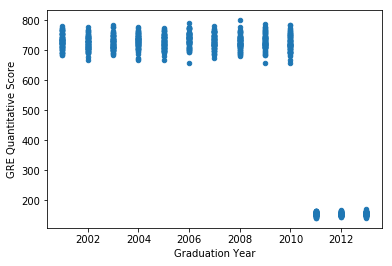

In [29]:
# Code and output of scatterplot
import matplotlib.pyplot as plt 

graduation_year  = dfII['grad_year']
GRE_quantitative_score = dfII['gre_qnt']
dfII.plot(x = 'grad_year', y = 'gre_qnt', kind = 'scatter')
plt.xlabel('Graduation Year')
plt.ylabel('GRE Quantitative Score')
plt.show()

In [30]:
print(dfII['grad_year'].describe())

count    1000.000000
mean     2006.994000
std         3.740582
min      2001.000000
25%      2004.000000
50%      2007.000000
75%      2010.000000
max      2013.000000
Name: grad_year, dtype: float64


Here is where I'll discuss any problems that jump out. I'll propose a solution here as well.
Obviously, we cannot compare the results directly from 2001 to 2013 because they used different scale. Directly comparing the results has no practical meaning. We have already know that the GRE quantitative scoring scale changed in 2011. Therefore, we use the following equation to adjust the GRE score before 2011 and make them in the range of 130 - 170.  
\begin{align}
new\_gre\_qnt = (170-130) \cdot \frac{gre\_qnt-200}{800-200}+130
\end{align}
Our goal is to change the scale of score before the year 2011 to the scale of score after the year 2011.  

In [31]:
print(dfII['gre_qnt'].describe())

count    1000.000000
mean      596.510118
std       242.361960
min       141.261398
25%       684.983551
50%       719.106878
75%       739.332537
max       799.715533
Name: gre_qnt, dtype: float64


In [32]:
# This is to get predicted GRE score for the year before 2011. 
dfII['new_gre_qnt'] = (dfII.gre_qnt - 200) / 600 * 40 + 130
print(dfII.head())

   grad_year     gre_qnt     salary_p4  new_gre_qnt
0     2001.0  739.737072  67400.475185   165.982471
1     2001.0  721.811673  67600.584142   164.787445
2     2001.0  736.277908  58704.880589   165.751861
3     2001.0  770.498485  64707.290345   168.033232
4     2001.0  735.002861  51737.324165   165.666857


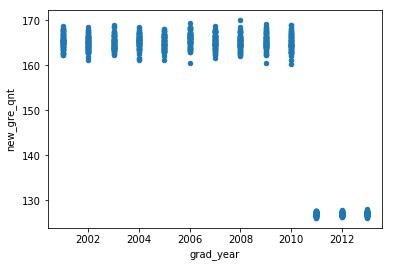

In [33]:
import matplotlib.pyplot as plt 

graduation_year  = dfII['grad_year']
GRE_quantitative_score = dfII['gre_qnt']
dfII.plot(x = 'grad_year', y = 'new_gre_qnt', kind = 'scatter')
plt.show()

In [34]:
print(dfII['new_gre_qnt'].describe())

count    1000.000000
mean      156.434008
std        16.157464
min       126.084093
25%       162.332237
50%       164.607125
75%       165.955502
max       169.981036
Name: new_gre_qnt, dtype: float64


After completing the above steps, we can use the variable 'gre_q_pre' in the regression. Because this variable is comparable across the time.   

#### (c) Create a scatterplot of income and graduation year

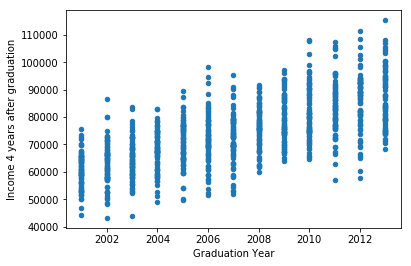

In [35]:
# Code and output of scatterplot
import matplotlib.pyplot as plt 


dfII.plot(x = 'grad_year', y = 'salary_p4', kind = 'scatter')
plt.xlabel('Graduation Year')
plt.ylabel('Income 4 years after graduation')
plt.show()

Here is where I'll discuss any problems again ... and propose another solution.

The problem is the primary salary data is from 2001 to 2013, which has time trend. We need to adjust the salary data to a comparable form. And here we use the salary data of 2001 as the base. 

In [36]:
#  Code to implement a solution
# This is to calculate the mean salary each year.
avg_inc_by_year = dfII['salary_p4'].groupby(dfII['grad_year']).mean().values

# This is to calculate the average growth rate in salaries across all 13 years
avg_growth_rate = ((avg_inc_by_year[1:] - avg_inc_by_year[:-1]) / avg_inc_by_year[:-1]).mean()

In [37]:
print(avg_growth_rate)

0.030835347092883603


In [38]:
# This is to adjust all the salary data to the base year. 

dfII['new_salary_p4'] = dfII.salary_p4/(1 + avg_growth_rate) ** (dfII.grad_year - 2001)
print(dfII.head())

   grad_year     gre_qnt     salary_p4  new_gre_qnt  new_salary_p4
0     2001.0  739.737072  67400.475185   165.982471   67400.475185
1     2001.0  721.811673  67600.584142   164.787445   67600.584142
2     2001.0  736.277908  58704.880589   165.751861   58704.880589
3     2001.0  770.498485  64707.290345   168.033232   64707.290345
4     2001.0  735.002861  51737.324165   165.666857   51737.324165


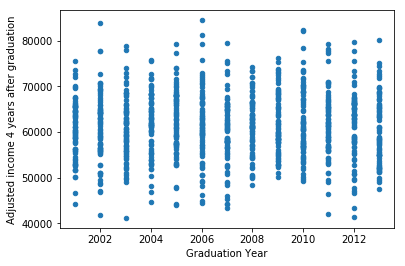

In [39]:
# This is the picture of adjusted income and Graduation year. 
import matplotlib.pyplot as plt
dfII.plot(x = 'grad_year', y = 'new_salary_p4', kind = 'scatter')
plt.xlabel('Graduation Year')
plt.ylabel('Adjusted income 4 years after graduation')
plt.show()

In [40]:
print(dfII['new_salary_p4'].describe())

count     1000.000000
mean     61419.808910
std       7135.610865
min      41164.726530
25%      56616.517414
50%      61467.616002
75%      66218.595876
max      84516.856633
Name: new_salary_p4, dtype: float64


#### (d) Re-estimate coefficients with updated variables.

In [34]:
# Code to re-estimate, output of new coefficients
result = sm.ols(formula="new_salary_p4 ~ new_gre_qnt", data=dfII).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:          new_salary_p4   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05403
Date:                Tue, 16 Oct 2018   Prob (F-statistic):              0.816
Time:                        21:21:14   Log-Likelihood:                -10291.
No. Observations:                1000   AIC:                         2.059e+04
Df Residuals:                     998   BIC:                         2.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.091e+04   2198.437     27.707      

In part (a), we used unadjusted GRE and salary data to get the estimated coefficienct for GRE quantitative score, which is -25.7632 and the p-value is 0.000; after we adjusted the salary data, the estimated coefficient for GRE quantitative score is 0.2166 and the p-value is 0.816.
Before we adjusted the data, though the coefficient is very significant, it couldn't give us a very good interpretation on the relationship between the salary and GRE quantitative score. This is because GRE scores are not in the same scale and the salary data has time trending. They are both imcomparable. 
After we adjusted the data, the coefficient is positive and insignificant. This means we cannot reject the null hypothesis that higher intelligence has no association with higher income. There are some possible reasons for this. Firstly, we cannot just assume GRE quantitative score can predict people's intelligence well, and we will need more proof on this. Secondly, there are other control variables that we should put in the regression like age, working location, ranking of the undergraduate and graduate universities, etc. Adding more control variables will help to capture the ability of explaining of our regression and also unbiased coefficient of GRE quantitative score. Thirdly, our data is randomly generated. We should use real world data on this in order to get solid results.      

### 3. Assessment of Kossinets and Watts.

See attached PDF. 